In [1]:
import pandas, numpy, seaborn, sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

## functions & options


In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [3]:
# %%time
# #Download the big expression data with all the transcripts
# path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm.tsv"
# df = pandas.read_csv(path, sep = "\t", index_col='sample')

# print(df.shape)
# df.head()

In [4]:
# # put ATG7_1 and ATG7_2 on the top
# isoforms_extract = df.loc[["ENST00000354449.7", "ENST00000354956.9"]]
# df = pandas.concat([isoforms_extract, df], axis=0)
# df.shape

In [5]:
# %%time
# print(df.shape)
# print('number of duplicated gene is', len(df.loc[df.index.duplicated()]))

# df = df[~df.index.duplicated(keep = 'first')]
# print(df.shape)
# df.head()

In [6]:
# #Save to csv to have the two ATG7 isoforms in the top of the dataframe
# path = "/xenabrowser_brut_data/all_transcripts/"
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm.tsv',sep = "\t")

In [7]:
# # 30% of the transcrits of the data
# df = df.iloc[:59112,:2358]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_30perc.tsv',sep = "\t")

# # 10% of the transcrits of the data
# df = df.iloc[:19704,:786]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_10perc.tsv',sep = "\t")

# #Do a subset to practice and save it
# # 1% of the transcrits of the data
# df = df.iloc[:1970,:78]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_1perc.tsv',sep = "\t")

In [8]:
%%time
#Download 30% of the big expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_30perc.tsv"
df = pandas.read_csv(path, sep = "\t")

print(df.shape)
df.set_index('sample', inplace = True)
df.index.name = None
df.head()

(59112, 2359)
Wall time: 26 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-Y114-1126-SM-4TT7V,GTEX-14B4R-0006-SM-5O9A7,GTEX-Y5V5-2426-SM-5IFJA,GTEX-X5EB-2426-SM-4E3HX,GTEX-X261-0011-R8A-SM-4E3I5,GTEX-12126-0926-SM-5FQTW,GTEX-11DXX-2126-SM-5PNYR,GTEX-11PRG-0926-SM-5EGI8,GTEX-OXRN-1726-SM-3NM9B,GTEX-13JUV-2326-SM-5IJCE
ENST00000354449.7,1.2467,2.9134,2.5451,2.9667,1.2556,3.1329,1.7870,2.8701,2.7255,0.9640,...,2.3109,2.0045,3.3793,3.1538,2.6599,2.8056,2.4065,3.0904,1.7451,1.4088
ENST00000354956.9,1.6273,0.9062,-2.1677,-1.0095,-2.0883,-9.9658,1.0377,1.7143,1.2445,-0.7949,...,-0.2901,3.2059,1.1796,1.0331,-1.5382,-1.1090,1.5789,-0.5756,-1.5882,0.5095
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-1.6703,-3.3683,-0.3390,-3.0604,-0.7859,-3.2399,-9.9658,-1.5274,-9.9658,-9.9658
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,-0.2409,-9.9658,1.8251,0.8026,-2.1146,-6.1492,1.2998,1.4950,0.3515,-2.5611
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-3.2599,-9.9658,-9.9658,-9.9658,-4.5978,-9.9658


In [9]:
#Calcul to have value from log2;  2**(x)-0.001
df = df.apply(lambda x: pow(2,x)-0.001)

#Calcul to have log2+1 from value;
df = df.apply(lambda x: numpy.log2(x+1))
df.head()

,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-Y114-1126-SM-4TT7V,GTEX-14B4R-0006-SM-5O9A7,GTEX-Y5V5-2426-SM-5IFJA,GTEX-X5EB-2426-SM-4E3HX,GTEX-X261-0011-R8A-SM-4E3I5,GTEX-12126-0926-SM-5FQTW,GTEX-11DXX-2126-SM-5PNYR,GTEX-11PRG-0926-SM-5EGI8,GTEX-OXRN-1726-SM-3NM9B,GTEX-13JUV-2326-SM-5IJCE
ENST00000354449.7,1.753596e+00,3.093039e+00,2.773044,3.140200e+00,1.759865e+00,3.288501e+00,2.153794e+00,3.054876e+00,2.928445e+00,1.560574e+00,...,2.575536e+00,2.325241e+00,3.511555e+00,3.307278e+00,2.871625,2.998284e+00,2.655550e+00,3.250404e+00,2.121407e+00,1.869541e+00
ENST00000354956.9,2.031516e+00,1.522610e+00,0.288731,5.808386e-01,3.035267e-01,-1.571525e-08,1.609732e+00,2.097737e+00,1.752048e+00,6.557027e-01,...,8.614356e-01,3.354205e+00,1.706703e+00,1.606640e+00,0.425797,5.485503e-01,1.995094e+00,7.398543e-01,4.131458e-01,1.276530e+00
ENST00000548312.5,1.334981e+00,-1.571525e-08,0.313188,2.405164e-01,-1.571525e-08,3.148972e-01,1.868237e-01,1.807989e-01,-1.571525e-08,7.787335e-02,...,3.930735e-01,1.320330e-01,8.396284e-01,1.620486e-01,0.659002,1.438512e-01,-1.571525e-08,4.285733e-01,-1.571525e-08,-1.571525e-08
ENST00000527779.1,2.877758e+00,8.421935e-01,2.296569,1.503695e+00,1.299457e+00,1.498259e+00,4.578739e-01,1.404410e+00,9.518594e-01,2.279644e-01,...,8.837907e-01,-1.571525e-08,2.183428e+00,1.455882e+00,0.298552,1.876213e-02,1.791167e+00,1.932682e+00,1.185795e+00,2.245914e-01
ENST00000454820.5,-1.571525e-08,-1.571525e-08,0.084396,-1.571525e-08,5.844029e-07,1.589167e-01,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,...,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,0.141947,-1.571525e-08,-1.571525e-08,-1.571525e-08,5.699623e-02,-1.571525e-08


In [10]:
genes = "ENST00000354449.7", "ENST00000354956.9"
g_names = "ATG7_1", "ATG7_2"
for i in range(len(genes)):
    print(f'{g_names[i]}: {df.loc[genes[i], :].sum()}')

ATG7_1: 6184.807054448431
ATG7_2: 2439.649032537076


In [11]:
ATG7_2_sum = 2439.648

print('shape before filtering', df.shape)
#create boolean and select the genes where sum is higher than ATG7(2) sum expression
bool_higher_iso2 = df.sum(axis=1) > ATG7_2_sum 
df = df[bool_higher_iso2]

print('shape after filtering', df.shape)

shape before filtering (59112, 2358)
shape after filtering (14017, 2358)


In [12]:
%%time
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 25))
number_clust_L = [] 
goodness_chs_L = []
goodness_dbi_L = []
for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(df)
    labels = kmeans_model.labels_
    goodness_chs = metrics.calinski_harabasz_score(df, labels)
    goodness_dbi = metrics.davies_bouldin_score(df, labels)
    
    #save score in list
    number_clust_L.append(nb)
    goodness_chs_L.append(goodness_chs)
    goodness_dbi_L.append(goodness_dbi)

#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, Goodness_DBI = goodness_dbi_L)
df_goodness = pandas.DataFrame.from_dict(d, orient='columns')
df_goodness.head()

Wall time: 8min 5s


,Number,Goodness_CHS,Goodness_DBI
0,2,8888.756541,1.021082
1,3,6854.288154,1.218390
2,4,5527.508929,1.498041
3,5,4560.935720,1.673719
4,6,3872.833750,1.967089


the elbow curve is at between 6 and 12


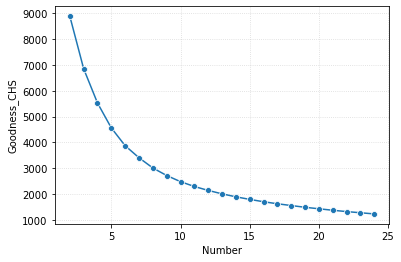

In [13]:
#plot the Goodness on the number to determine the best one.
##calinski_harabasz_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_CHS', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the elbow curve is at between 6 and 12')

the plateau start at 7


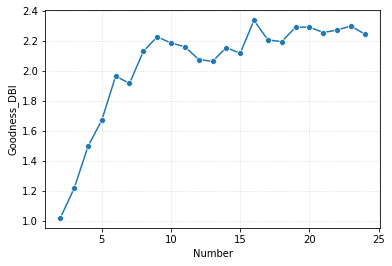

In [14]:
#davies_bouldin_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_DBI', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the plateau start at 7')

In [15]:
# 10 is the best number of cluster
kmeans_model = KMeans(n_clusters = 11, random_state=1).fit(df)
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(df)
print(pred_cluster)
#add the prediction in a column
df['cluster_11'] = pred_cluster
df.head()

[ 3  5  1 ... 10 10  7]


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-14B4R-0006-SM-5O9A7,GTEX-Y5V5-2426-SM-5IFJA,GTEX-X5EB-2426-SM-4E3HX,GTEX-X261-0011-R8A-SM-4E3I5,GTEX-12126-0926-SM-5FQTW,GTEX-11DXX-2126-SM-5PNYR,GTEX-11PRG-0926-SM-5EGI8,GTEX-OXRN-1726-SM-3NM9B,GTEX-13JUV-2326-SM-5IJCE,cluster_11
ENST00000354449.7,1.753596,3.093039,2.773044,3.140200,1.759865,3.288501e+00,2.153794,3.054876,2.928445,1.560574,...,2.325241,3.511555,3.307278,2.871625,2.998284,2.655550,3.250404,2.121407,1.869541,3
ENST00000354956.9,2.031516,1.522610,0.288731,0.580839,0.303527,-1.571525e-08,1.609732,2.097737,1.752048,0.655703,...,3.354205,1.706703,1.606640,0.425797,0.548550,1.995094,0.739854,0.413146,1.276530,5
ENST00000625998.2,2.172597,2.098120,0.604361,1.012243,1.839938,2.112940e+00,1.961354,1.282651,2.350597,1.159347,...,0.790838,2.071058,2.846877,1.291925,3.411351,2.045518,2.307654,1.764098,2.094595,1
ENST00000583693.5,1.679476,1.659720,2.343766,2.182024,1.596109,1.608522e+00,1.097292,2.342481,1.919266,0.945588,...,0.851128,1.994794,2.118942,1.271190,3.548827,2.202967,2.555088,1.244871,0.949492,1
ENST00000012134.6,0.028054,1.528813,1.308149,0.799196,0.096761,2.200149e+00,1.560507,1.650502,1.646210,1.745232,...,0.752919,1.917354,1.450293,2.425033,3.798581,1.270956,3.193881,2.440844,2.352608,1


In [16]:
#ATG7 is not in the list
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

print(df['cluster_11'][[ATG7_1, ATG7_2]])

ENST00000354449.7    3
ENST00000354956.9    5
Name: cluster_11, dtype: int32


In [17]:
'The two genes are not in the same cluster. They are different'

'The two genes are not in the same cluster. They are different'